### Notebook to generate a parameter set using a latin hypercube

Theodore Barnhart

March 15, 2017

In [1]:
n = 500 # number of samples
m = 8 # number of parameters

In [2]:
import pyDOE as doe # python package with latin hypercube support
from scipy.stats.distributions import uniform

In [3]:
lhd = doe.lhs(m,samples=n) # draw a latin hyper cube of parameters

In [4]:
# define the distributions to rescale the parameters from the hypercube
gw1 = uniform(loc=0.0001,scale=0.4) # % water to the groundwater store
gw2 = uniform(loc=0.0001,scale=1) # % water from the groundwater store to the stream
m = uniform(loc=0.01,scale=30.) # decay of ksat with depth
ksat = uniform(loc=0.,scale=10.) # ksat
crd = uniform(loc=2,scale=10.) # conifer rooting depth
trd = uniform(loc=0.1,scale=2.) # tundra rooting depth
po = uniform(loc=0.1,scale=1.7) # pore size index
pa = uniform(loc=0.1,scale=1.7) # air entry pressure

dists = [gw1,gw2,m,ksat,crd,trd,po,pa]

In [5]:
# move the hypercube to a dataframe and rescale each parameter set using the define uniform distributions
names = ['gw1','gw2','m','ksat','crd','trd','po','pa']
df = pd.DataFrame()

ct = 0
for name,dist in zip(names,dists):
    df[name] = dist.ppf(lhd[:,ct])
    ct += 1

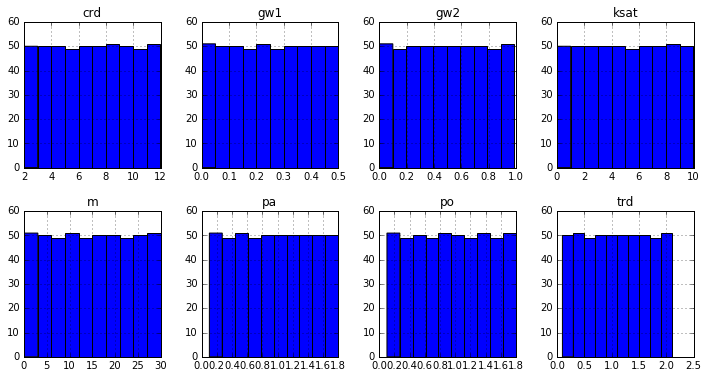

In [6]:
df.hist(figsize=(12,6),layout=(2,4));